In [1]:
import os
import glob
import numpy as np
import pylab as pl
import cPickle as pkl
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
%matplotlib notebook

In [3]:
simulated_datafiles = glob.glob('/home/julianarhee/Repositories/retinotopy-mapper/tests/simulation/structs/*FFT*_simulated.pkl')
print(simulated_datafiles)

['/home/julianarhee/Repositories/retinotopy-mapper/tests/simulation/structs/D_target_FFT_V-Right_0_(1, 1)_simulated.pkl', '/home/julianarhee/Repositories/retinotopy-mapper/tests/simulation/structs/D_target_FFT_V-Left_0_(1, 1)_simulated.pkl', '/home/julianarhee/Repositories/retinotopy-mapper/tests/simulation/structs/D_target_FFT_H-Down_0_(1, 1)_simulated.pkl', '/home/julianarhee/Repositories/retinotopy-mapper/tests/simulation/structs/D_target_FFT_H-Up_0_(1, 1)_simulated.pkl']


In [4]:
def load_cond_fft(simulated_datafiles, cond):
    df = [f for f in simulated_datafiles if cond in f][0]

    with open(df, 'rb') as f:
        ft = pkl.load(f)
    return ft


def correct_phase_wrap(phase):
        
    corrected_phase = phase.copy()
    
    corrected_phase[phase<0] =- phase[phase<0]
    corrected_phase[phase>0] = (2*np.pi) - phase[phase>0]
    
    return corrected_phase

In [61]:
def convert_values(oldval, newmin=None, newmax=None, oldmax=None, oldmin=None):
    oldrange = (oldmax - oldmin)
    newrange = (newmax - newmin)
    newval = (((oldval - oldmin) * newrange) / oldrange) + newmin
    return newval


In [28]:
ft_left = load_cond_fft(simulated_datafiles, 'V-Left')
ft_right = load_cond_fft(simulated_datafiles, 'V-Right')
ft_top = load_cond_fft(simulated_datafiles, 'H-Down')
ft_bottom = load_cond_fft(simulated_datafiles, 'H-Up')
print ft_left.keys()

['phase_map', 'ft', 'ft_real', 'target_freq', 'freqs', 'binsize', 'dynrange', 'fps', 'mean_intensity', 'reduce_factor', 'nframes', 'ft_imag', 'target_bin']


In [30]:
phase_left = ft_left['phase_map']
phase_right = ft_right['phase_map'][:, 0:phase_left.shape[-1]]
print phase_left.shape, phase_right.shape

phase_top = ft_top['phase_map']
phase_bottom = ft_bottom['phase_map']
print phase_bottom.shape, phase_top.shape

(93, 120) (93, 120)
(93, 148) (93, 148)


# AZIMUTH: test cmap and directionality 

<IPython.core.display.Javascript object>


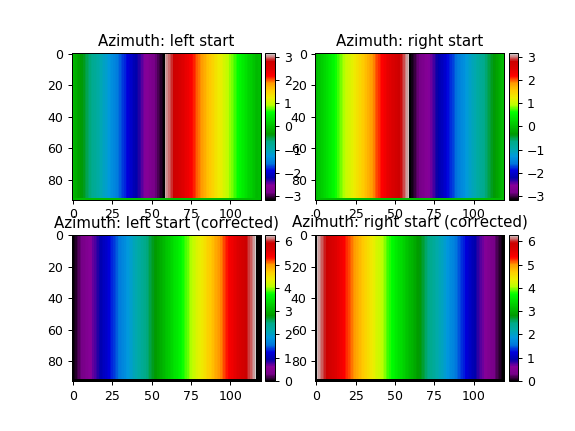

In [32]:
fig, axes = pl.subplots(2,2) #pl.figure()

# Show FFT left-start phasemap:
axes[0, 0].set_title('Azimuth: left start')
im1 = axes[0, 0].imshow(phase_left, cmap='nipy_spectral', vmin=-np.pi, vmax=np.pi)

divider = make_axes_locatable(axes[0, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Show FFT right-start phasemap:
axes[0, 1].set_title('Azimuth: right start')
im1 = axes[0, 1].imshow(phase_right, cmap='nipy_spectral', vmin=-np.pi, vmax=np.pi)

divider = make_axes_locatable(axes[0, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')



# Correct LEFT phasemap:
corrected_left = correct_phase_wrap(phase_left)
axes[1, 0].set_title('Azimuth: left start (corrected)')
im1 = axes[1, 0].imshow(corrected_left, cmap='nipy_spectral', vmin=0, vmax=2*np.pi)

divider = make_axes_locatable(axes[1, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Correct RIGHT phasemap:
corrected_right = correct_phase_wrap(phase_right)
axes[1, 1].set_title('Azimuth: right start (corrected)')
im1 = axes[1, 1].imshow(corrected_right, cmap='nipy_spectral', vmin=0, vmax=2*np.pi)

divider = make_axes_locatable(axes[1, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')


# Azimuth:  absolute maps

<IPython.core.display.Javascript object>


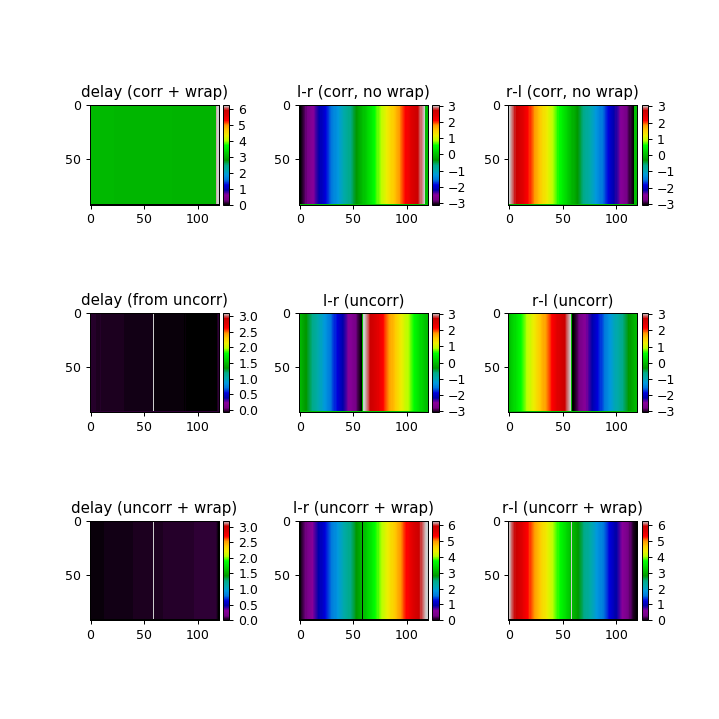

3.0964443055


In [98]:
# ROW 1:  All calculations with CORRECTED phases (0, 2pi)
# ROW 2:  All calculations with UNCORRECTED phases (-pi, pi), no re-wrapping
# ROW 3:  same as Row 2, but with corrected phase wrap on final

fig, axes = pl.subplots(3,3, figsize=(8,8)) #pl.figure()

# Row 1: --------------------------------------------------
delay_az = (corrected_left + corrected_right) /2.
absolute_az_lr= (corrected_left - corrected_right) /2.
absolute_az_rl = (corrected_right - corrected_left) /2.

delay_az = correct_phase_wrap(delay_az)

ax = axes[0, 0]
ax.set_title('delay (corr + wrap)')
p1 = ax.imshow(delay_az,  cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

ax = axes[0, 1]
ax.set_title('l-r (corr, no wrap)')
p2 = ax.imshow(absolute_az_lr, cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p2, cax=cax, orientation='vertical')

ax = axes[0, 2]
ax.set_title('r-l (corr, no wrap)')
p3 = ax.imshow(absolute_az_rl, cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p3, cax=cax, orientation='vertical')

pl.subplots_adjust(wspace=0.5, hspace=0.5)
print np.median(delay_az)

# Row 2:  -----------------------------------------------
delay_az_uncorrected = (phase_left + phase_right) /2.
absolute_az_lr_uncorrected = (phase_left - phase_right) /2.
absolute_az_rl2_uncorrected = (phase_right - phase_left) /2.

ax = axes[1, 0]
ax.set_title('delay (from uncorr)')
p1 = ax.imshow(delay_az_uncorrected,  cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

ax = axes[1, 1]
ax.set_title('l-r (uncorr)')
p2 = ax.imshow(absolute_az_lr_uncorrected, cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p2, cax=cax, orientation='vertical')


ax = axes[1, 2]
ax.set_title('r-l (uncorr)')
p3 = ax.imshow(absolute_az_rl2_uncorrected, cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p3, cax=cax, orientation='vertical')

# Row 3: ----------------------------------------------------------

ax = axes[2, 0]
ax.set_title('delay (uncorr + wrap)')
delay_az_uncorr_wrap = correct_phase_wrap(delay_az_uncorrected)
p1 = ax.imshow(delay_az_uncorr_wrap,  cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

ax = axes[2, 1]
ax.set_title('l-r (uncorr + wrap)')
absolute_az_lr_uncorr_wrap = correct_phase_wrap(absolute_az_lr_uncorrected)
p2 = ax.imshow(absolute_az_lr_uncorr_wrap, cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p2, cax=cax, orientation='vertical')


ax = axes[2, 2]
ax.set_title('r-l (uncorr + wrap)')
absolute_az_rl2_uncorr_wrap = correct_phase_wrap(absolute_az_rl2_uncorrected)
p3 = ax.imshow(absolute_az_rl2_uncorr_wrap, cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p3, cax=cax, orientation='vertical')



<IPython.core.display.Javascript object>


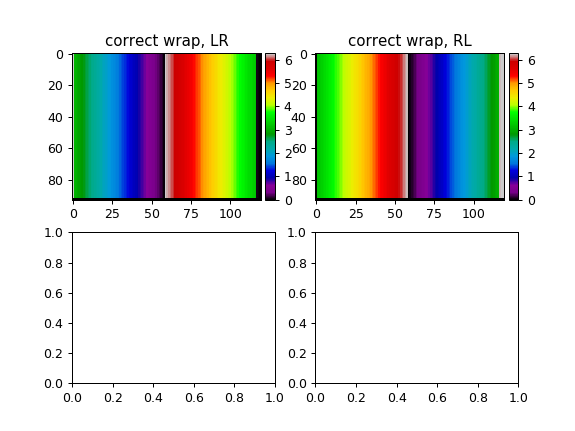

In [90]:
fig, axes = pl.subplots(2,2)

ax = axes[0,0]
ax.set_title('correct wrap, LR')
corrected_lr = correct_phase_wrap(absolute_az_lr)
p1 = ax.imshow(corrected_lr,  cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

ax = axes[0,1]
ax.set_title('correct wrap, RL')
corrected_rl = correct_phase_wrap(absolute_az_rl)
p2 = ax.imshow(corrected_rl,  cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p2, cax=cax, orientation='vertical')


# Shift each map, rather than use both to calculate abs

<IPython.core.display.Javascript object>


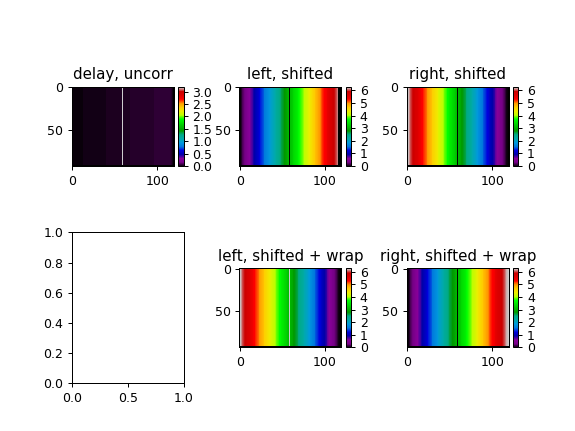

0.0705197134297


In [142]:
delay_az1 = (phase_left + phase_right) /2.
delay_az1 = correct_phase_wrap(delay_az1)


left_shifted = corrected_left - delay_az1
right_shifted = corrected_right - delay_az1

fig, axes = pl.subplots(2,3)
pl.subplots_adjust(wspace=0.5)

ax = axes[0, 0]
ax.set_title('delay, uncorr')
p0 = ax.imshow(delay_az1, cmap='nipy_spectral') #, vmin=0, vmax=2*np.pi)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p0, cax=cax, orientation='vertical')

ax = axes[0, 1]
ax.set_title('left, shifted')
p1 = ax.imshow(left_shifted, cmap='nipy_spectral', vmin=0, vmax=2*np.pi)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

ax = axes[0, 2]
ax.set_title('right, shifted')
p1 = ax.imshow(right_shifted, cmap='nipy_spectral', vmin=0, vmax=2*np.pi)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')



ax = axes[1,1]
left_shifted_wrap = correct_phase_wrap(left_shifted)
ax.set_title('left, shifted + wrap')
p1 = ax.imshow(left_shifted_wrap, cmap='nipy_spectral', vmin=0, vmax=2*np.pi)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

ax = axes[1,2]
right_shifted_wrap = correct_phase_wrap(right_shifted)
ax.set_title('right, shifted + wrap')
p1 = ax.imshow(right_shifted_wrap, cmap='nipy_spectral', vmin=0, vmax=2*np.pi)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

print delay_az1.mean()

# Azimuth: convert to linear screen coords

In [60]:
height, width = absolute_az_lr.shape
print width, height

120 93


('New min/max:', 1.7746388030391813, 119.09873825377542)


<IPython.core.display.Javascript object>


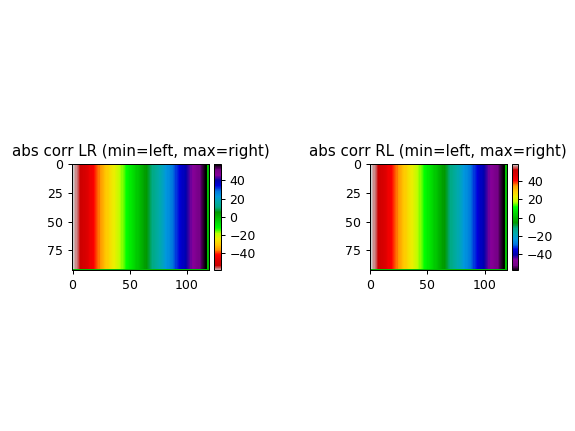

In [110]:
screen_left = -1*width/2.
screen_right = width/2.


#absolute_az = absolute_az_lr.copy() #correct_phase_wrap(absolute_az_lr.copy())
oldmin = -np.pi
oldmax = np.pi #np.pi
newmin = screen_left
newmax = screen_right

linX_lr = convert_values(absolute_az_lr, newmin=newmin, newmax=newmax, #screen_left, #screen_left, screen_right,
                      oldmax = oldmax, oldmin = oldmin)

linX_rl = convert_values(absolute_az_rl, newmin=newmin, newmax=newmax, #screen_left, #screen_left, screen_right,
                      oldmax = oldmax, oldmin = oldmin)


print("New min/max:", linX.min(), linX.max())

fig, axes = pl.subplots(1,2)

ax = axes[0]
ax.set_title('abs corr LR (min=left, max=right)')
p1 = ax.imshow(linX_lr, cmap='nipy_spectral_r')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

ax = axes[1]
ax.set_title('abs corr RL (min=left, max=right)')
p2 = ax.imshow(linX_rl,  cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p2, cax=cax, orientation='vertical')

pl.subplots_adjust(wspace=1)

# ELEVATION: test cmap and directionality

<IPython.core.display.Javascript object>


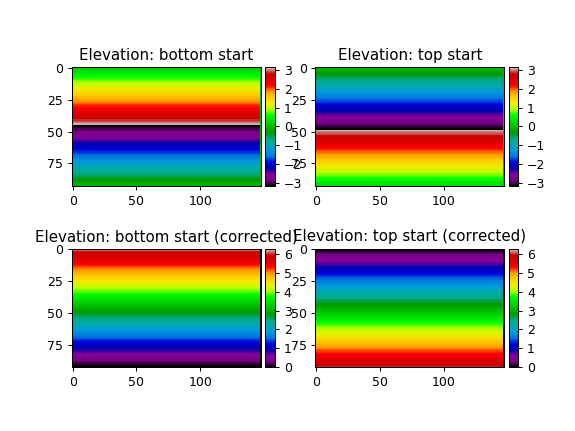

In [17]:
fig, axes = pl.subplots(2,2) #pl.figure()

# Show FFT left-start phasemap:
axes[0, 0].set_title('Elevation: bottom start')
im1 = axes[0, 0].imshow(ft_bottom['phase_map'], cmap='nipy_spectral', vmin=-np.pi, vmax=np.pi)

divider = make_axes_locatable(axes[0, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Show FFT right-start phasemap:
axes[0, 1].set_title('Elevation: top start')
im1 = axes[0, 1].imshow(ft_top['phase_map'], cmap='nipy_spectral', vmin=-np.pi, vmax=np.pi)

divider = make_axes_locatable(axes[0, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Correct LEFT phasemap:
corrected_bottom = correct_phase_wrap(ft_bottom['phase_map'])
axes[1, 0].set_title('Elevation: bottom start (corrected)')
im1 = axes[1, 0].imshow(corrected_bottom, cmap='nipy_spectral', vmin=0, vmax=2*np.pi)

divider = make_axes_locatable(axes[1, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Correct RIGHT phasemap:
corrected_top = correct_phase_wrap(ft_top['phase_map'])
axes[1, 1].set_title('Elevation: top start (corrected)')
im1 = axes[1, 1].imshow(corrected_top, cmap='nipy_spectral', vmin=0, vmax=2*np.pi)

divider = make_axes_locatable(axes[1, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')


# Elevation:  absolute maps

<IPython.core.display.Javascript object>


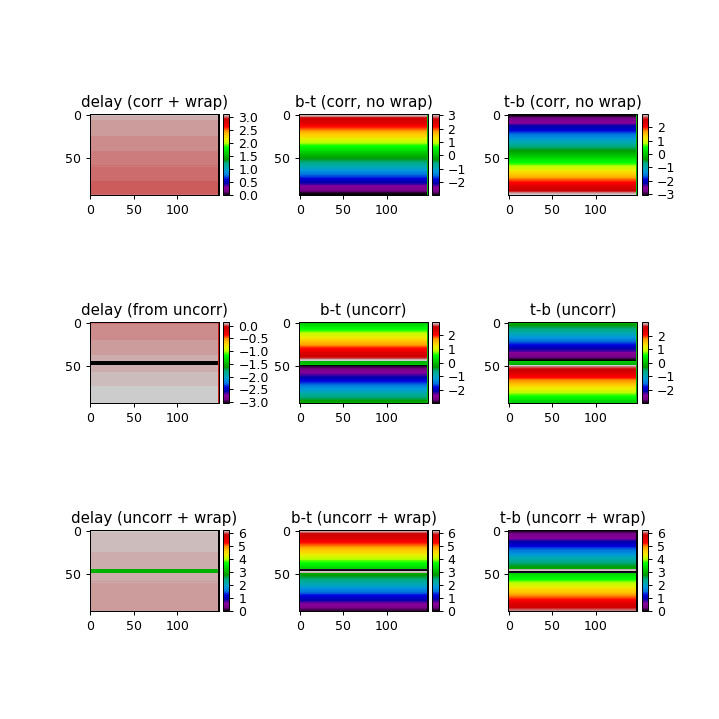

3.03542496436


In [108]:
# ROW 1:  All calculations with CORRECTED phases (0, 2pi)
# ROW 2:  All calculations with UNCORRECTED phases (-pi, pi), no re-wrapping
# ROW 3:  same as Row 2, but with corrected phase wrap on final

fig, axes = pl.subplots(3,3, figsize=(8,8)) #pl.figure()

# Row 1: --------------------------------------------------
delay_el = (corrected_top + corrected_bottom) /2.
absolute_el_bt= (corrected_bottom - corrected_top) /2.
absolute_el_tb = (corrected_top - corrected_bottom) /2.

delay_el = correct_phase_wrap(delay_el)

ax = axes[0, 0]
ax.set_title('delay (corr + wrap)')
p1 = ax.imshow(delay_el,  cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

ax = axes[0, 1]
ax.set_title('b-t (corr, no wrap)')
p2 = ax.imshow(absolute_el_bt, cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p2, cax=cax, orientation='vertical')

ax = axes[0, 2]
ax.set_title('t-b (corr, no wrap)')
p3 = ax.imshow(absolute_el_tb, cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p3, cax=cax, orientation='vertical')

pl.subplots_adjust(wspace=0.5, hspace=0.5)
print np.median(delay_el)

# Row 2:  -----------------------------------------------
delay_el_uncorrected = (phase_top + phase_bottom) /2.
absolute_el_bt_uncorrected = (phase_bottom - phase_top) /2.
absolute_el_tb_uncorrected = (phase_top - phase_bottom) /2.

ax = axes[1, 0]
ax.set_title('delay (from uncorr)')
p1 = ax.imshow(delay_el_uncorrected,  cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

ax = axes[1, 1]
ax.set_title('b-t (uncorr)')
p2 = ax.imshow(absolute_el_bt_uncorrected, cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p2, cax=cax, orientation='vertical')


ax = axes[1, 2]
ax.set_title('t-b (uncorr)')
p3 = ax.imshow(absolute_el_tb_uncorrected, cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p3, cax=cax, orientation='vertical')

# Row 3: ----------------------------------------------------------

ax = axes[2, 0]
ax.set_title('delay (uncorr + wrap)')
delay_el_uncorr_wrap = correct_phase_wrap(delay_el_uncorrected)
p1 = ax.imshow(delay_el_uncorr_wrap,  cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

ax = axes[2, 1]
ax.set_title('b-t (uncorr + wrap)')
absolute_el_bt_uncorr_wrap = correct_phase_wrap(absolute_el_bt_uncorrected)
p2 = ax.imshow(absolute_el_bt_uncorr_wrap, cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p2, cax=cax, orientation='vertical')


ax = axes[2, 2]
ax.set_title('t-b (uncorr + wrap)')
absolute_el_tb_uncorr_wrap = correct_phase_wrap(absolute_el_tb_uncorrected)
p3 = ax.imshow(absolute_el_tb_uncorr_wrap, cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p3, cax=cax, orientation='vertical')


# Elevation: convert to linear coords 

('New min/max:', -44.033435189697052, 45.41397126558374)


<IPython.core.display.Javascript object>


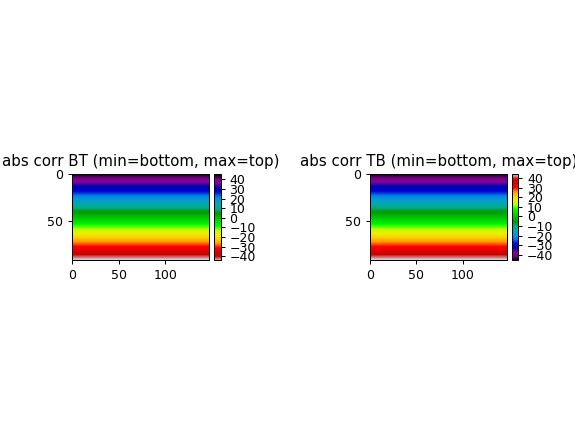

In [111]:
screen_bottom = -1*height/2.
screen_top = height/2.

oldmin = -np.pi
oldmax = np.pi #np.pi
newmin = screen_bottom
newmax = screen_top

linY_bt = convert_values(absolute_el_bt, newmin=newmin, newmax=newmax, #screen_left, #screen_left, screen_right,
                      oldmax = oldmax, oldmin = oldmin)

linY_tb = convert_values(absolute_el_tb, newmin=newmin, newmax=newmax, #screen_left, #screen_left, screen_right,
                      oldmax = oldmax, oldmin = oldmin)


print("New min/max:", linY_bt.min(), linY_bt.max())

fig, axes = pl.subplots(1,2)

ax = axes[0]
ax.set_title('abs corr BT (min=bottom, max=top)')
p1 = ax.imshow(linY_bt, cmap='nipy_spectral_r')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

ax = axes[1]
ax.set_title('abs corr TB (min=bottom, max=top)')
p2 = ax.imshow(linY_tb,  cmap='nipy_spectral')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p2, cax=cax, orientation='vertical')

pl.subplots_adjust(wspace=1)